# IBM Python

## Module 2 Data wrangling

Converting data from the initial format to a format that may be better for analysis.

** Key points: Missing values, Standardization, Normalization, Binning, Indicator variables **

In [27]:
# Import data
import pandas as pd

In [28]:
# URL path
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [29]:
# Give data headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [30]:
# Read csv data and assign header
df = pd.read_csv(filename, names=headers)
print("Done")

Done


In [31]:
# Display first 5 rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Missing data

**How to work with missing data:**

Steps for working with missing data:
1. Identify missing data
2. Deal with missing data
3. Correct data format

** 1. Identify and handle missing data **

Replace "?" by NaN

** .replace(A, B, inplace = True) **

In [32]:
import numpy as np   # to use np.nan 

In [33]:
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


** Dectect missing values **

** .isnull() or .notnull() **

In [34]:
# define missing data as an array
missing_data = df.isnull()
missing_data.head()   # this return whether each value in the table is missing value or not

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


** Count missing values **

.value_couts()

In [35]:
# Use loop
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())   # True for missing values, False for non-missing
    print("")   # for clear display format

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

** 2. Deal with missing data **

How to deal with missing data:

1. Drop data 
    a. drop the whole row
    b. drop the whole column
2. Replace data
    a. replace it by mean
    b. replace it by frequency
    c. replace it based on other functions

No need to drop in this case, we'll replace data.

** a. Replace by mean ** 

In [36]:
# For "normalized-losses"
# Average of the column
avg_1 = df["normalized-losses"].astype("float").mean(axis=0)
# Replace NaN by avg_1
df["normalized-losses"].replace(np.nan, avg_1, inplace=True)
# For "bore"
# Average of the column
avg_2 = df["bore"].astype("float").mean(axis=0)
# Replace NaN by avg_1
df["bore"].replace(np.nan, avg_2, inplace=True)
# For "stroke"
avg_3=df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_3, inplace=True)
# For "horsepower"
avg_4=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_4, inplace=True)
# For "perk-rpm"
avg_5=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_5, inplace=True)

** b. Replace by frequency **

In [37]:
# For # of doors
df['num-of-doors'].value_counts()
df['num-of-doors'].value_counts().idxmax()   # identify the most frequent value
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

In [38]:
# drop all rows that do not have price data
df.dropna(subset=["price"], axis=0, inplace =True)
# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


C'est bon! Now we have data sans missing values!

** 3. Correct data format **

** .dtype() to check the data type **

** .astype() to change the data type  **

In [39]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [40]:
# Convert data types to proper format:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
print("Done")

Done


In [41]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

** What is Standardization?**

Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.

E.g. Conversion: mpg -> L/100km

In [42]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [43]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [44]:
# Rename 
# rename column name from "highway-mpg" to "highway-L/100km"
#df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check 
#df.head()

### Data Normalization

** Why normalization? **

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.

In [45]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [46]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning

** Why binning? **

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis, i.e. categorize!

In [47]:
# correct type
df["horsepower"]=df["horsepower"].astype(float, copy=True)
# set bin width
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
# set bin interval
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

array([  48. ,  101.5,  155. ,  208.5])

In [48]:
# set group names
group_names = ['Low', 'Medium', 'High']   # 3 groups for four ranges

In [49]:
# categorize values into each bin
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


** Bins visualization **

Normally, a histogram is used to visualize the distribution of bins we created above.

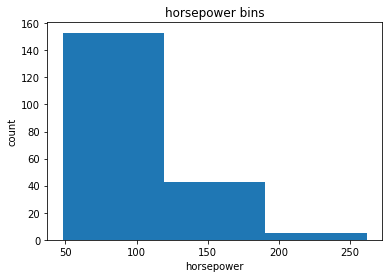

In [50]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw histogram of "horsepower", bin=3
plt.pyplot.hist(df['horsepower'], bins=3)

# lables
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Indicator variable

**What is an indicator variable?**

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

**Why do we use indicator variables?**

So that we can use categorical variables for regression analysis in the later modules.

**Example**

We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type.

In [51]:
# Get indicator variables and assign it to data frame "dummy_variable_1":
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [52]:
# change column names
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [53]:
# insert back to original table
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Medium,0.0,1.0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Medium,0.0,1.0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0.0,1.0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Medium,0.0,1.0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Medium,0.0,1.0


In [54]:
# create indicator variable to the column of "aspiration"
dummy_variable_2 = pd.get_dummies(df['aspiration'])
# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [55]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Medium,0.0,1.0,1.0,0.0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Medium,0.0,1.0,1.0,0.0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0.0,1.0,1.0,0.0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Medium,0.0,1.0,1.0,0.0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Medium,0.0,1.0,1.0,0.0


In [56]:
# save the table
df.to_csv('clean_df.csv')